<a href="https://colab.research.google.com/github/Shreyash54/HealthMisinfoDetection/blob/main/SEM7_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [5]:
df = pd.read_csv('/content/drive/MyDrive/HEALTH ASSURED/cleaned_dataset.csv')

# Combine 'statement' and 'description' columns into a single 'text' column
df['text'] = df['statement'] + ' ' + df['description']

max_words = 10000  # Maximum number of words to keep based on word frequency
max_sequence_length = 200  # Maximum length of input sequences

# Ensure 'text' column contains string values and convert to lowercase
df['text'] = df['text'].apply(lambda x: str(x).lower())

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=max_sequence_length)

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['rating'])
y = to_categorical(y)  # One-hot encode the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
embedding_dim = 100
lstm_units = 64

In [7]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(lstm_units))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 64

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)



Epoch 1/10
7/7 [==============================] - 7s 545ms/step - loss: 0.6886 - accuracy: 0.5206 - val_loss: 0.6785 - val_accuracy: 0.5182
Epoch 2/10
7/7 [==============================] - 2s 221ms/step - loss: 0.6588 - accuracy: 0.7064 - val_loss: 0.6453 - val_accuracy: 0.7909
Epoch 3/10
7/7 [==============================] - 2s 221ms/step - loss: 0.5766 - accuracy: 0.8555 - val_loss: 0.5528 - val_accuracy: 0.7909
Epoch 4/10
7/7 [==============================] - 2s 240ms/step - loss: 0.4146 - accuracy: 0.9060 - val_loss: 0.4797 - val_accuracy: 0.8273
Epoch 5/10
7/7 [==============================] - 2s 237ms/step - loss: 0.2510 - accuracy: 0.9748 - val_loss: 0.4581 - val_accuracy: 0.8545
Epoch 6/10
7/7 [==============================] - 2s 240ms/step - loss: 0.1969 - accuracy: 0.9472 - val_loss: 0.3834 - val_accuracy: 0.8364
Epoch 7/10
7/7 [==============================] - 2s 284ms/step - loss: 0.1630 - accuracy: 0.9794 - val_loss: 0.3752 - val_accuracy: 0.8545
Epoch 8/10
7/7 [====

In [8]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


5/5 [==============================] - 0s 32ms/step - loss: 0.3539 - accuracy: 0.8686
Test loss: 0.3538789749145508
Test accuracy: 0.8686131238937378


In [10]:

# Make predictions on new statements (replace 'new_statements' with your own data)
new_statements = ["Is air pollution linked to greater risk of dementia?"]
new_sequences = tokenizer.texts_to_sequences(new_statements)
new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions = model.predict(new_sequences)
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
print("Predictions:")
for statement, prediction in zip(new_statements, decoded_predictions):
    print(f'Statement: {statement}')
    print(f'Prediction: {prediction}')

1/1 [==============================] - 0s 33ms/step
Predictions:
Statement: Is air pollution linked to greater risk of dementia?
Prediction: True


In [12]:
from sklearn.metrics import classification_report

# Generate predictions on the test data
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels (assuming y_pred is one-hot encoded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels (assuming y_test is one-hot encoded)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes)

# Print the classification report
print(report)

5/5 [==============================] - 0s 53ms/step
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        69
           1       0.83      0.93      0.88        68

    accuracy                           0.87       137
   macro avg       0.87      0.87      0.87       137
weighted avg       0.87      0.87      0.87       137



In [13]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_true_classes, y_pred_classes)

# Extract TP, FP, TN, FN from the confusion matrix
TP = confusion_matrix_result[1, 1]  # True Positives
FP = confusion_matrix_result[0, 1]  # False Positives
TN = confusion_matrix_result[0, 0]  # True Negatives
FN = confusion_matrix_result[1, 0]  # False Negatives

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 63
False Positives (FP): 13
True Negatives (TN): 56
False Negatives (FN): 5


In [14]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_true_classes, y_pred_classes)

# Extract TP, FP, TN, FN from the confusion matrix
TP = confusion_matrix_result[1, 1]  # True Positives
FP = confusion_matrix_result[0, 1]  # False Positives
TN = confusion_matrix_result[0, 0]  # True Negatives
FN = confusion_matrix_result[1, 0]  # False Negatives

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 63
False Positives (FP): 13
True Negatives (TN): 56
False Negatives (FN): 5


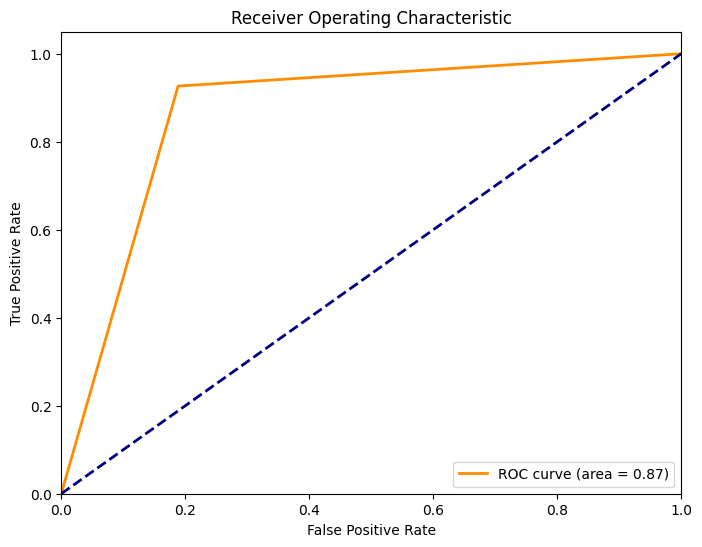

AUC (Area Under the ROC Curve): 0.8690323955669225


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# ... (your model training and evaluation code)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_classes, y_pred_classes)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true_classes, y_pred_classes)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC (Area Under the ROC Curve): {roc_auc}")
